In [962]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [963]:
X_train = pd.read_csv('data/train.csv', index_col='PassengerId')
X_test = pd.read_csv('data/test.csv', index_col='PassengerId')
twix = (X_train, X_test)
X_train.sample(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
243,0,2,"Coleridge, Mr. Reginald Charles",male,29.0,0,0,W./C. 14263,10.5000,NaN,S
805,1,3,"Hedman, Mr. Oskar Arvid",male,27.0,0,0,347089,6.9750,NaN,S
121,0,2,"Hickman, Mr. Stanley George",male,21.0,2,0,S.O.C. 14879,73.5000,NaN,S
276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
752,1,3,"Moor, Master. Meier",male,6.0,0,1,392096,12.4750,E121,S


In [964]:
X_test.sample(5)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1067,2,"Brown, Miss. Edith Eileen",female,15.0,0,2,29750,39.00,NaN,S
1021,3,"Petersen, Mr. Marius",male,24.0,0,0,342441,8.05,NaN,S
917,3,"Robins, Mr. Alexander A",male,50.0,1,0,A/5. 3337,14.50,NaN,S
981,2,"Wells, Master. Ralph Lester",male,2.0,1,1,29103,23.00,NaN,S
1196,3,"McCarthy, Miss. Catherine Katie""""",female,NaN,0,0,383123,7.75,NaN,Q


In [965]:
X_train.info()
print('-' * 40)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 n

In [966]:
def compute_ticket(ticket):
    ticket = ticket.split()
    return ticket[0] if len(ticket) > 1 else None
for X in twix:
    X["label"] = X.Ticket.apply(compute_ticket)

In [967]:
for X in twix:
    X.loc[(X.label == 'C.A.') | (X.label == 'CA.') | (X.label == 'CA') | (X.label == 'C.A./SOTON'), 'label'] = 'CA'

In [968]:
for X in twix:
    X.loc[(X.label == 'STON/O') | (X.label == 'SOTON/O.Q.') | (X.label == 'SOTON/OQ') | (X.label == 'STON/O2.') | (X.label == 'SOTON/O2'), 'label'] = 'SOTON'

In [969]:
for X in twix:
    X.loc[(X.label == 'A/5.') | (X.label == 'A./5.') | (X.label == 'A.5.'), 'label'] = 'A/5'

In [970]:
for X in twix:
    X.loc[(X.label == 'W./C.'), 'label'] = 'W/C'

In [971]:
for X in twix:
    X.loc[(X.label == 'SC/Paris') | (X.label == 'S.C./PARIS') | (X.label == 'SC/AH') | (X.label == 'SC'), 'label'] = 'SC/PARIS'

In [972]:
for X in twix:
    X.loc[(X.label == 'A/4.') | (X.label == 'A4.') | (X.label == 'A/4'), 'label'] = 'A/5'

In [973]:
for X in twix:
    X.loc[(X.label != 'CA') & (X.label != 'SOTON') & (X.label != 'A/5') & (X.label != 'W/C') & (X.label != 'SC/PARIS') & (~X.label.isna()), 'label'] = 'rare'

<Axes: xlabel='label', ylabel='count'>

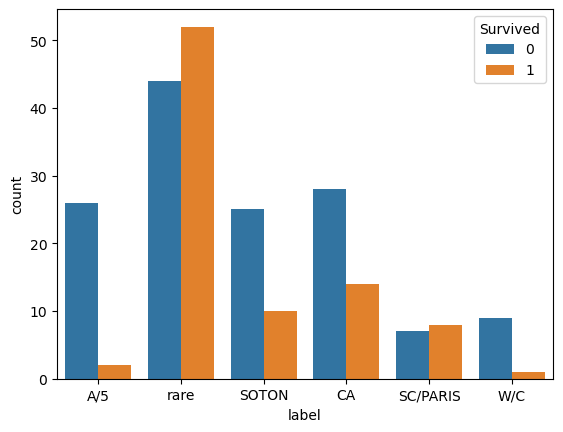

In [974]:
sns.countplot(data=X_train, x='label', hue='Survived')

In [975]:
for X in twix:
    X.label = X.label.fillna('none')
X_train.label.value_counts()

none        665
rare         96
CA           42
SOTON        35
A/5          28
SC/PARIS     15
W/C          10
Name: label, dtype: int64

In [976]:
for X in twix:
     X.drop(['Ticket'], axis=1, inplace=True)

In [977]:
for X in twix:
    X.Cabin.fillna('none', inplace=True)
    X['cabin_type'] = X['Cabin'].apply(lambda cabin: cabin[0])

In [978]:
X_train.query("cabin_type != 'n'")

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,label,cabin_type
PassengerId,,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,rare,C
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,none,C
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,E46,S,none,E
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,16.7000,G6,S,rare,G
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,26.5500,C103,S,none,C
...,...,...,...,...,...,...,...,...,...,...,...,...
872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,52.5542,D35,S,none,D
873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,5.0000,B51 B53 B55,S,none,B
880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,83.1583,C50,C,none,C


<Axes: xlabel='cabin_type', ylabel='count'>

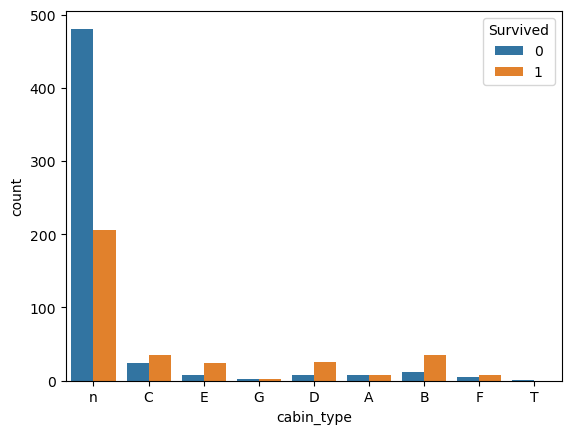

In [979]:
sns.countplot(data=X_train, x='cabin_type', hue='Survived')

In [980]:
X_train.loc[X_train.cabin_type == 'T', 'cabin_type'] = 'n'

In [981]:
for X in twix:
     X.drop(['Cabin'], axis=1, inplace=True)

In [982]:
for X in twix:
    X['status'] = X.Name.str.extract('([a-zA-Z]+)\.', expand=False)
pd.crosstab(X_train.status, X_train.Survived)

Survived,0,1
status,,
Capt,1,0
Col,1,1
Countess,0,1
Don,1,0
Dr,4,3
Jonkheer,1,0
Lady,0,1
Major,1,1
Master,17,23


In [983]:
for X in twix:
    X['status'] = X['status'].replace(['Don', 'Sir', 'Capt', 'Col', 'Dr', 'Jonkheer', 'Major', 'Rev', 'Sir'], 'Mr')
    X['status'] = X['status'].replace(['Mlle', 'Ms', 'Mme', 'Lady', 'Countess', 'Dona'], 'Mrs')

In [984]:
X_train[['status', 'Survived']].groupby(['status'], as_index=False).mean()

,status,Survived
0,Master,0.575000
1,Miss,0.697802
2,Mr,0.161710
3,Mrs,0.801527


In [985]:
X_test.groupby('status').Pclass.mean()

status
Master    2.714286
Miss      2.435897
Mr        2.302041
Mrs       1.837838
Name: Pclass, dtype: float64

In [986]:
for X in twix:
    X.drop('Name', axis=1, inplace=True)

In [987]:
X_train.groupby(['Sex', 'Pclass']).Age.median()

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [988]:
np.random.seed(123)
for X in twix:
    for index, value in X.groupby(['Sex', 'Pclass']).Age.median().items():
        temp = X.loc[(X['Sex'] == index[0]) & (X['Pclass'] == index[1]) & (X.Age.isna()), 'Age']
        X.loc[(X['Sex'] == index[0]) & (X['Pclass'] == index[1]) & (X.Age.isna()), 'Age'] = value + (X.loc[(X['Sex'] == index[0]) & (X['Pclass'] == index[1]), 'Age'].std() / 5) * np.random.randn(temp.size)

<Axes: xlabel='Age', ylabel='Count'>

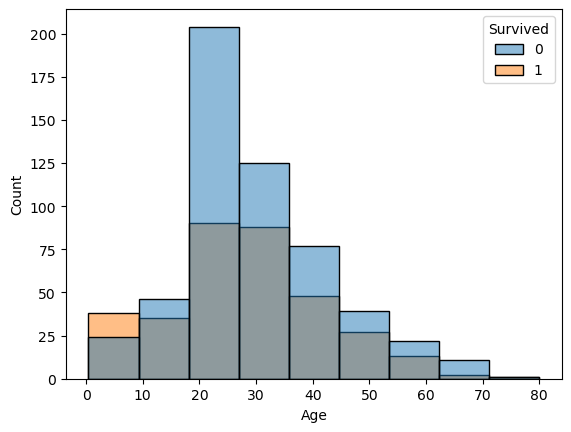

In [989]:
sns.histplot(data=X_train, x='Age', hue='Survived', bins=9)

In [990]:
X_train['age_group'] = pd.cut(X_train.Age, 9)
intervals = list(X_train[['age_group', 'Survived']].groupby(['age_group']).mean().index)
for i, interval in enumerate(intervals):
    for X in twix:
        X.loc[(X['Age'] >= int(interval.left)) & (X['Age'] <= int(interval.right)), 'age_cat'] = f'{i}group'

In [991]:
X_train.drop('age_group', axis=1, inplace=True)

In [992]:
X_train.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,label,cabin_type,status,age_cat
PassengerId,,,,,,,,,,,,
511,1,3,male,29.0,0,0,7.7500,Q,none,n,Mr,3group
830,1,1,female,62.0,0,0,80.0000,NaN,none,B,Mrs,7group
362,0,2,male,29.0,1,0,27.7208,C,SC/PARIS,n,Mr,3group
374,0,1,male,22.0,0,0,135.6333,C,rare,n,Mr,2group
583,0,2,male,54.0,0,0,26.0000,S,none,n,Mr,6group


In [993]:
for X in twix:
    X['family_size'] = X['SibSp'] + X['Parch'] + 1
    
(X_train.groupby('family_size', as_index=False).Pclass
 .mean().sort_values(by='Pclass', ascending=False))

,family_size,Pclass
6,7,3.000000
7,8,3.000000
8,11,3.000000
4,5,2.666667
5,6,2.590909
0,1,2.400372
2,3,2.225490
3,4,2.068966
1,2,1.919255


In [994]:
for X in twix:
    X['is_alone'] = np.where(X.family_size == 1, 1, 0)
X_train.groupby('is_alone').Survived.mean()

is_alone
0    0.505650
1    0.303538
Name: Survived, dtype: float64

In [995]:
for X in twix:
    X.drop(['Parch', 'SibSp', 'family_size'], axis=1, inplace=True)
X_train.sample()

,Survived,Pclass,Sex,Age,Fare,Embarked,label,cabin_type,status,age_cat,is_alone
PassengerId,,,,,,,,,,,
697,0,3,male,44.0,8.05,S,none,n,Mr,5group,1


In [996]:
for X in twix:
    X['age*class'] = X['Age'] * X['Pclass']
X_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,label,cabin_type,status,age_cat,is_alone,age*class
PassengerId,,,,,,,,,,,,
1,0,3,male,22.0,7.2500,S,A/5,n,Mr,2group,0,66.0
2,1,1,female,38.0,71.2833,C,rare,C,Mrs,4group,0,38.0
3,1,3,female,26.0,7.9250,S,SOTON,n,Miss,3group,1,78.0
4,1,1,female,35.0,53.1000,S,none,C,Mrs,4group,0,35.0
5,0,3,male,35.0,8.0500,S,none,n,Mr,4group,1,105.0


In [997]:
X_test.drop('Age', inplace=True, axis=1)

In [998]:
X_train.drop('Age', inplace=True, axis=1)

In [999]:
port_mode = X_train.Embarked.mode()[0]

In [1000]:
for X in twix:
    X['Embarked'] = X['Embarked'].fillna(port_mode)

In [1001]:
X_train.groupby('Embarked').Survived.mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

In [1002]:
for X in twix:
    X['Embarked'] = X['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
X_train.head()

,Survived,Pclass,Sex,Fare,Embarked,label,cabin_type,status,age_cat,is_alone,age*class
PassengerId,,,,,,,,,,,
1,0,3,male,7.2500,0,A/5,n,Mr,2group,0,66.0
2,1,1,female,71.2833,1,rare,C,Mrs,4group,0,38.0
3,1,3,female,7.9250,0,SOTON,n,Miss,3group,1,78.0
4,1,1,female,53.1000,0,none,C,Mrs,4group,0,35.0
5,0,3,male,8.0500,0,none,n,Mr,4group,1,105.0


In [1003]:
X_test.Fare.fillna(X_test.Fare.median(), inplace=True)

In [1004]:
X_train['fare_group'] = pd.qcut(X_train.Fare, 4)
intervals = list(X_train.groupby('fare_group').Survived.mean().index)
for X in twix:
    for i, interval in enumerate(intervals):
        X.loc[(X['Fare'] >= interval.left) & (X['Fare'] <= interval.right), 'Fare'] = i

In [1005]:
for X in twix:
    X.loc[X.Fare == X.Fare.max(), 'Fare'] = 3

In [1006]:
X_train.drop('fare_group', axis=1, inplace=True)

In [1007]:
X_test.status.fillna(3, inplace=True)

In [1008]:
for X in twix:
    X.Fare = X.Fare.astype(np.int32)

In [1009]:
X_train.head(10)

,Survived,Pclass,Sex,Fare,Embarked,label,cabin_type,status,age_cat,is_alone,age*class
PassengerId,,,,,,,,,,,
1,0,3,male,0,0,A/5,n,Mr,2group,0,66.000000
2,1,1,female,3,1,rare,C,Mrs,4group,0,38.000000
3,1,3,female,1,0,SOTON,n,Miss,3group,1,78.000000
4,1,1,female,3,0,none,C,Mrs,4group,0,35.000000
5,0,3,male,1,0,none,n,Mr,4group,1,105.000000
6,0,3,male,1,2,none,n,Mr,3group,1,80.889885
7,0,1,male,3,0,none,E,Mr,6group,1,54.000000
8,0,3,male,2,0,none,n,Master,0group,0,6.000000
9,1,3,female,1,0,none,n,Mrs,3group,0,81.000000


In [1010]:
X_test.head(10)

,Pclass,Sex,Fare,Embarked,label,cabin_type,status,age_cat,is_alone,age*class
PassengerId,,,,,,,,,,
892,3,male,0,2,none,n,Mr,3group,1,103.5
893,3,female,0,0,none,n,Mrs,5group,0,141.0
894,2,male,1,2,none,n,Mr,7group,1,124.0
895,3,male,1,0,none,n,Mr,3group,1,81.0
896,3,female,1,0,none,n,Mrs,2group,0,66.0
897,3,male,1,0,none,n,Mr,1group,1,42.0
898,3,female,0,2,none,n,Miss,3group,1,90.0
899,2,male,2,0,none,n,Mr,3group,0,52.0
900,3,female,0,1,none,n,Mrs,2group,1,54.0


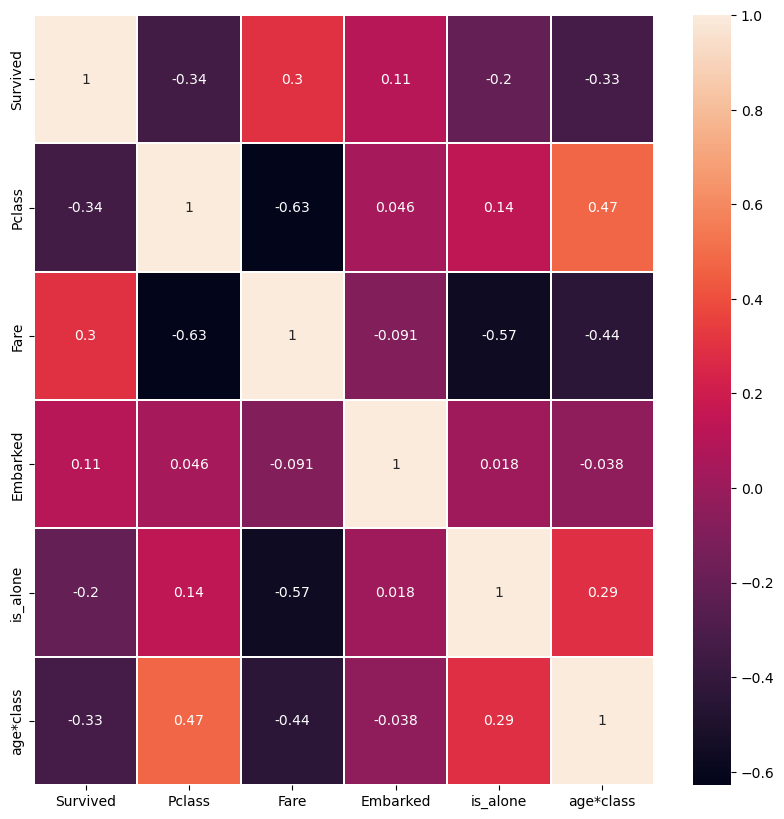

In [1011]:
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(X_train.corr(numeric_only=True),annot=True,linewidths=.1)
plt.show()

In [1012]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

In [1013]:
X_train.columns

Index(['Survived', 'Pclass', 'Fare', 'Embarked', 'is_alone', 'age*class',
       'Sex_male', 'label_CA', 'label_SC/PARIS', 'label_SOTON', 'label_W/C',
       'label_none', 'label_rare', 'cabin_type_B', 'cabin_type_C',
       'cabin_type_D', 'cabin_type_E', 'cabin_type_F', 'cabin_type_G',
       'cabin_type_n', 'status_Miss', 'status_Mr', 'status_Mrs',
       'age_cat_1group', 'age_cat_2group', 'age_cat_3group', 'age_cat_4group',
       'age_cat_5group', 'age_cat_6group', 'age_cat_7group', 'age_cat_8group'],
      dtype='object')

In [1014]:
X_test.columns

Index(['Pclass', 'Fare', 'Embarked', 'is_alone', 'age*class', 'Sex_male',
       'label_CA', 'label_SC/PARIS', 'label_SOTON', 'label_W/C', 'label_none',
       'label_rare', 'cabin_type_B', 'cabin_type_C', 'cabin_type_D',
       'cabin_type_E', 'cabin_type_F', 'cabin_type_G', 'cabin_type_n',
       'status_Miss', 'status_Mr', 'status_Mrs', 'age_cat_1group',
       'age_cat_2group', 'age_cat_3group', 'age_cat_4group', 'age_cat_5group',
       'age_cat_6group', 'age_cat_7group', 'age_cat_8group'],
      dtype='object')

In [1015]:
X_train.to_csv("data/X_train.csv")
X_test.to_csv("data/X_test.csv")

In [1016]:
X_train.shape, X_test.shape

((891, 31), (418, 30))